Seguem abaixo os métodos implementados, foram implementados:


1.  Retrosubstituição
2.  Eliminação de Gauss
3.  Fatoração L.U
4.  Gauss Jacobi
5.  Gauss Seidel
6.  Lagrange
7.  Método de newton (Diferenças divididas)

Foi utilizado a bilioteca Numpy principalmente para cálculo de determinante, concatenação das matrizes e para reproduzir a idéia de linha 1 recebe linha 1



Retrosubstituição:

In [ ]:
# Retrosubstituicao

Matriz = [
    [3, 1, 2],
    [0, 3, 1],
    [0, 0, 3]
    ]
b = [
    5, 
    7,
    3
]

n = len(Matriz)

x = [0] * n
for i in range(n-1, -1, -1):
    soma = 0
    for j in range(i+1, n):
        soma = soma + Matriz[i][j] * x[j]
    x[i] = (b[i] - soma)/Matriz[i][i]
    print('o valor de x é ', x)
print("O valor de x0 é: ", x[0])

Eliminação de Gauss

In [ ]:
# Eliminacao_Gauss
import numpy as np

# Dados iniciais caso utilize o numpy
A = np.array([[3.0, 2.0, 4.0],
    [1, 1, 2],
    [4, 3, -2]])

B =  np.array([1.0, 2.0, 3])
B_numpy2 = np.array([[1, 2, 3]]) #Um pequeno trabalho apenas para mostrar a matriz A|B

A_ = np.copy(A) #Cópia da matriz A para verificar possíveis diferenças
B_ = np.copy(B) #Cópia da matriz A para verificar possíveis diferenças

matriz_A = np.concatenate((A,B_numpy2.T), axis = 1)
print("--------------------------")
print(f"A matriz expandida é:\n{matriz_A} ") 
print("--------------------------")

n = len(A)

#Cálculo do determinante
det_A = np.linalg.det(A)

# Condicional determinante
if det_A != 0:
    print(f'Tudo ok com o determinante Det(A) = {det_A}')
else:
    print(f'O pivô é igual a zero, logo a conclusão está incorreta')

# Utilizando o numpy para realizar a mudança das linhas da matriz A
for k in range(0, n-1): 
    pivo = A[k, k]
    for i in range(k+1, n): 
        m_lk = A[i, k]/pivo
        B[i] = B[i] - m_lk*B[k] 
        A[i, :] = A[i, :] - m_lk*A[k, :] #Receber os valores para as mudanças de linhas
print(f'A matriz é::\n {A[0]} \n {A[1]} \n {A[2]} \n ')

# Método da retrosubstituição normal
x = [0] * n
for i in range(n-1, -1, -1):
    soma = 0
    for j in range(i+1, n):
        soma = soma + A[i, j] * x[j]
    x[i] = (B[i] - soma)/A[i, i]
    print('o valor de x é ', x)
print("O valor de x0 é: ", x[0]) 

solucao = np.dot(A_,x) # O produto de A inicial pelo vetor solução, esse método encontra o produto escalar entre 2 arrays
print(f'A solução é: {solucao}') # A solução tem que ser igual ao vetor B
print(f'O vetor inicial é {B_}')

Fatoração L.U

In [ ]:
# Fatoracao_LU
import numpy as np

# É de suma importância digitar os valores com vírgulas para que os valores
# sejam floats, assim não havendo problemas de divisões inteiras.

A = np.array([[3.0, 2.0, 4.0], [1.0, 1.0, 2.0], [4.0, 3.0, -2.0]])
B = np.array([[1.0, 2.0, 3.0]])

# Matriz expandida
matriz_A = np.concatenate((A,B.T), axis = 1)
print(f'A matriz expandida A|B = \n {matriz_A} \n')

#Definindo Matriz U
U = np.copy(A)

#Definindo tamanho de n e criando uma matriz n x n para auxiliar L
n = len(A)
L = (np.eye(n, n))

#Cálculo do determinante
det_A = np.linalg.det(A)

# Condicional determinante
if det_A != 0:
    print(f'Tudo ok com o determinante Det(A) = {det_A}\n')
else:
    print(f'O pivô é igual a zero, logo a conclusão está incorreta')

for k in np.arange (n-1):
    pivo = U[k, k]
    for i in np.arange (k+1, n):
        m_Linha = U[i, k]/ pivo
        U[i, :] = U[i, :] - m_Linha * U[k, :]
        L[i, k] = m_Linha

print(f'A matriz L é: \n {L} \n')
print(f'A matriz U é: \n {U} \n')



Gauss Jacobi

In [ ]:
# Gauss Jacobi
import numpy as np

A = [[10, 2, 1], [1, 5, 1], [2, 3, 10]]
b = [7, -8, 6]
maxIteracoes = int(input("Digite o valor máximo de iterações que deseja: \n"))
eps = float(input("Digite o valor do epsilon que deseja: \n"))
iteracao = 0

A_numpy = np.array(A)
B_numpy =  np.array(b)

n = len(b)
x_anterior = b.copy()


#Cálculo do determinante
det_A = np.linalg.det(A) 
print(det_A)

x_atual = x_anterior.copy()

# Condicional determinante
if det_A == 0:
    print(f'O determinante é igual a zero, logo a solução estará incorreta')

else:
    print(f'Tudo ok com o determinante Det(A) = {det_A}')
    for i in range(0, n):
        x_anterior[i] = b[i]/A[i][i]
    while (iteracao < maxIteracoes ):
        iteracao += 1
        for i in range(0, n):
            soma = 0
            for j in range(0, n):
                if i != j:
                    soma = soma + A[i][j] * x_anterior[j]
            x_atual[i] = ((1/A[i][i])*(b[i]- soma))
        print("Iteração: ", iteracao)
        print("x atual é", x_atual)
        print("x anterior é: ", x_anterior)

        Dist_Abs=[]
        Valor_Dist_abs = 0
        for i in range(0, len(x_anterior)):
            for j in range(0, 1):
                D_a = x_anterior[i]-x_atual[i]
                Dist_Abs.append(D_a)
            Valor_Dist_abs = max(np.abs((Dist_Abs)))
            # print(f'O valor da distância absoluta é: {Valor_Dist_abs}')

        if Valor_Dist_abs < eps:
            print(f'O critério de parada foi atingido, onde o valor máximo da distância absoluta {Valor_Dist_abs} é menor que o valor do epsilon {eps}')
            break
        x_anterior = x_atual.copy()
    
    print(f' O valor encontrado de x foi:\n {x_anterior}')






Gauss Seidel


In [ ]:
# Gauss Seidel
import numpy as np

A = [[10, 2, 1], [1, 5, 1], [2, 3, 10]]
b = [7, -8, 6]
maxIteracoes = int(input("Digite o valor máximo de iterações que deseja: \n"))
eps = float(input("Digite o valor do epsilon que deseja: \n"))
iteracao = 0

A_numpy = np.array(A)
B_numpy =  np.array(b)

n = len(b)
x_anterior = b.copy()

#Cálculo do determinante
det_A = np.linalg.det(A) 
print(det_A)

# Condicional determinante

x_atual = x_anterior.copy()


if det_A == 0:
    print(f'O determinante é igual a zero, logo a solução estará incorreta')

else:
    print(f'Tudo ok com o determinante Det(A) = {det_A}')
    for i in range(0, n):
        x_anterior[i] = b[i]/A[i][i]
    while (iteracao < maxIteracoes ):
        iteracao += 1
        for i in range(0, n):
            soma = 0
            for j in range(0, n):
                if i > j:
                    soma = soma + A[i][j] * x_atual[j]
                if i < j:
                    soma = soma + A[i][j] * x_anterior[j]
            x_atual[i] = ((1/A[i][i])*(b[i]- soma))
        print("Iteração: ", iteracao)
        print("x atual é", x_atual)
        print("x anterior é: ", x_anterior)

        Dist_Abs=[]
        Valor_Dist_abs = 0
        for i in range(0, len(x_anterior)):
            for j in range(0, 1):
                D_a = x_anterior[i]-x_atual[i]
                Dist_Abs.append(D_a)
            Valor_Dist_abs = max(np.abs((Dist_Abs)))
            # print(f'O valor da distância absoluta é: {Valor_Dist_abs}')

        if Valor_Dist_abs < eps:
            print(f'O critério de parada foi atingido, onde o valor máximo da distância absoluta {Valor_Dist_abs} é menor que o valor do epsilon {eps}')
            break
        x_anterior = x_atual.copy()
    
    print(f' O valor encontrado de x foi:\n {x_anterior}')

Lagrange


Digite a lista de valores de x: -1,0,2
Digite a lista de valores de y: 4,1,-1
A lista de valores de x foi: 
 [-1, 0, 2] 
 e de y foi: 
 [4, 1, -1] 
 você confirma sua escolha? Sim = 1, Não = 0
1
Digite o grau do polinomino: 2
Digite o valor de X para o qual você quer achar o de Y: 1
[-1, 0, 2, 1.0]
[-0.3333333333333333, 1.0, 0.3333333333333333]

O y encontrado foi: -0.6666666666666665 

O Polinômio da função é: 
 (4)*L0(x)+(1)*L1(x)+(-1)*L2(x) 

Os valores de L(x) são respectivamente, começando do l0(x): 
[-0.3333333333333333, 1.0, 0.3333333333333333]
 


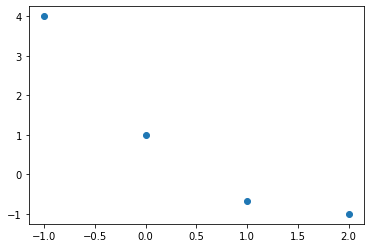

In [ ]:
# Lagrange
import matplotlib.pyplot as plt
x = eval('[' + input("Digite a lista de valores de x: ") + ']')
y = eval('[' + input("Digite a lista de valores de y: ") + ']')
print(f'A lista de valores de x foi: \n {x} \n e de y foi: \n {y} \n você confirma sua escolha? Sim = 1, Não = 0')
confirma = int(input())
while confirma != 1:
    x = eval('[' + input("Digite a lista de valores de x: ") + ']')
    y = eval('[' + input("Digite a lista de valores de y: ") + ']')
    print(f'A lista de valores de x foi: \n {x} \n e de y foi: \n {y} \n você confirma sua escolha? Sim = 1, Não = 0')
    confirma = int(input())

n = int(input('Digite o grau do polinomino: '))
x_dado = float(input('Digite o valor de X para o qual você quer achar o de Y: '))

lista_grafico_x = x.copy()
lista_grafico_y = y.copy()
lista_grafico_x.append(x_dado)
print(lista_grafico_x)


y_f = 0
lista_aux = []

for i in range(0, n+1):
    prod = 1
    for j in range(0, n+1):
        if i!= j:
            prod = prod * (x_dado - x[j])/(x[i]-x[j])
    lista_aux.append(prod)  
    y_f = y_f + prod*y[i]

lista_grafico_y.append(y_f)
print(lista_aux)
print(f'\nO y encontrado foi: {y_f} \n')
print(f'O Polinômio da função é: \n ({y[0]})*L0(x)+({y[1]})*L1(x)+({y[2]})*L2(x) \n')
print(f'Os valores de L(x) são respectivamente, começando do l0(x): \n{lista_aux}\n ')
plt.scatter(lista_grafico_x,lista_grafico_y)
plt.show()


Método de Newton

Digite a lista de valores de x: -1,0,2
Digite a lista de valores de y: 4,1,-1
A lista de valores de x foi: 
 [-1, 0, 2] 
 e de y foi: 
 [4, 1, -1] 
 você confirma sua escolha? Sim = 1, Não = 0
1
Digite o valor de X para o qual você quer achar o de Y: 1
[-1, 0, 2, 1.0]

Os valores de d0, d1, d2, dn estão respectivamente na lista abaixo: 
[4, -3.0, 0.6666666666666666, 0.0]



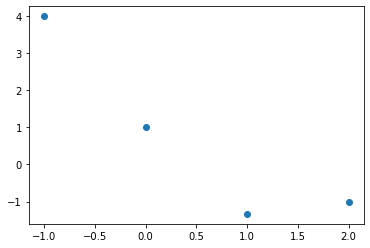

O valor encontrado de Y para x = 1.0 foi: -1.3333333333333335


In [ ]:
# Metodo de Newton
import numpy as np
import matplotlib.pyplot as plt

x = eval('[' + input("Digite a lista de valores de x: ") + ']')
y = eval('[' + input("Digite a lista de valores de y: ") + ']')
print(f'A lista de valores de x foi: \n {x} \n e de y foi: \n {y} \n você confirma sua escolha? Sim = 1, Não = 0')
confirma = int(input())
while confirma != 1:
    x = eval('[' + input("Digite a lista de valores de x: ") + ']')
    y = eval('[' + input("Digite a lista de valores de y: ") + ']')
    print(f'A lista de valores de x foi: \n {x} \n e de y foi: \n {y} \n você confirma sua escolha? Sim = 1, Não = 0')
    confirma = int(input())
    
x_dado = float(input('Digite o valor de X para o qual você quer achar o de Y: '))

lista_grafico_x = x.copy()
lista_grafico_y = y.copy()
lista_grafico_x.append(x_dado)
print(lista_grafico_x)

n = len(x)
lista_numpy = np.zeros([n, n+1]) 
f = lista_numpy.tolist() #converter a array do numpy em uma lista 

for i in range(n):
    f[i][0] = y[i]

for i in range(1, n):
    for j in range(0, n-i):
        f[j][i] = (f[j+1][i-1]-f[j][i-1])/(x[j+i]-x[j])

#p2(x) = d0 +d1(x_dado-x0)+d2(x_dado-x0)(x_dado-x1)
ordem_0 = f[0][0]
print(f'\nOs valores de d0, d1, d2, dn estão respectivamente na lista abaixo: \n{f[0]}\n')
soma = ordem_0
for i in range(0,n):
    soma += f[0][i+1]*(x_dado - x[i])

lista_grafico_y.append(soma)
plt.scatter(lista_grafico_x,lista_grafico_y)
plt.show()


print(f'O valor encontrado de Y para x = {x_dado} foi: {soma}')
# O valor encontrado não coincidiu com o que deveria ser, porém d0, d1 e d2 bateram com o resultado,
# acredito ter errado no calculo do somatório porém analisando a fórmula de p2(x) não imagino onde esteja errado
# Apesar de tentar fazer uma implementação do gráfico ele não saiu tão bem quanto esperado por conta do valor encontrato estar incoerente